#[개념정리]

##**DataFrame 데이터 삭제**  

DataFrame.drop(labels=None, axis=0, index=True, columns=None,inplace=False,errors='raise')  
가장 주요한 파라미터 : axis  
axis=0 > 특정 로우 드롭  
axis=1 > 틀정 칼럼 드롭  
inplace=True > 기존 데이터프레임 수정, 반환 값 없음
inplace=False > 기존 데이터프레임 수정 x, 수정된 데이터 프레임 반환  
여러 칼럼 없애고 싶으면 리스트로 전달하면 됨.





##**데이터 셀렉션 및 필터링**    

Numpy: '[]'연산자 내 단일 값 추출, 슬라이싱, 인덱싱 등으로 데이터 추출  
Pandas: iloc[], loc[] 연산자를 통해 동일한 작업 수행  
[]는 칼럼 지정 연산자  

**DataFrame 바로 뒤의 []연산자는 넘파이의 []나 Series의 []과는 다르다.**  

**DataFrame 바로 뒤의 []내 입력값은 칼럼명을 지정해 칼럼 지정 연산에 사용하거나 불린 인덱스 용도로만 사용해야 한다.**  
자주 쓰이는 용도 : 마지막 행을 불러올 때,
iloc[:,:-1]

**가이드 라인**  
1. 개별 또는 여러 칼럼 값 전체를 추출? > df['']충분 하지만 행과 열을 같이 추출해야하면 iloc 이용  
2. 명칭기반, 위치기반 (loc,iloc) 차이 확실히 알기  
3. 명칭기반은 슬라이싱을 할 때 종료점을 포함한다.

#[코드필사]

##1. 판다스 시작- 파일을 DataFrame으로 로딩, 기본 API

In [1]:
import pandas as pd

In [2]:
titanic_df = pd.read_csv('/content/train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
titanic_df = pd.read_csv('/content/train.csv')
print('titanic 변수 type:',type(titanic_df))
titanic_df

titanic 변수 type: <class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
print('DataFrame 크기:', titanic_df.shape)

DataFrame 크기: (891, 12)


In [6]:
#칼럼의 타입과 null 값, 데이터 분포도 등의 메타 데이터 등도 조회가 가능
#info(), describe()
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#분포도 알기
titanic_df.describe()
#여기서 count는 not-null 의 갯수

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [9]:
titanic_pclass = titanic_df['Pclass']
print(type(titanic_pclass))

<class 'pandas.core.series.Series'>


In [10]:
titanic_pclass.head() #모든 시리즈와 데이터프레임은 인덱스 값을 가진다.

,Pclass
0,3
1,1
2,3
3,1
4,3


In [11]:
value_counts = titanic_df['Pclass'].value_counts()
print(type(value_counts))
print(value_counts)

<class 'pandas.core.series.Series'>
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [12]:
#value_counts()는 기본적으로 null 값을 포함하지 않고 반환함.
print('titanic_df 데이터 건수:', titanic_df.shape[0])
print('기본 설정인 dropna=True로 value_counts()')
#value_counts()는 디폴트로 dropna = True이므로 value_counts(dropna=True)와 동일.
print(titanic_df['Embarked'].value_counts())
print(titanic_df['Embarked'].value_counts(dropna=False))

titanic_df 데이터 건수: 891
기본 설정인 dropna=True로 value_counts()
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


##DataFrame과 리스트, 딕셔너리, 넘파이 ndarray 상호 변환

In [13]:
import numpy as np

col_name1 = ['col1']
list1=[1,2,3]
array1 = np.array(list1)
print('array1 shape:', array1.shape)
#리스트를 이용해 DataFrame 생성
df_list1 = pd.DataFrame(list1, columns = col_name1)
print('1차원 리스트로 만든 DataFrame:\n', df_list1)
#넘파이 ndarray를 이용해 DataFrame 생성
df_array1 = pd.DataFrame(array1, columns=col_name1)
print('1차원 ndarray로 만든 DataFrame:\n', df_array1)

array1 shape: (3,)
1차원 리스트로 만든 DataFrame:
    col1
0     1
1     2
2     3
1차원 ndarray로 만든 DataFrame:
    col1
0     1
1     2
2     3


In [14]:
#3개의 칼럼명이 필요함
col_name2=['col1','col2','col3']

#2행 3열 형태의 리스트와 ndarray 생성한 뒤 이를 DataFrame으로 변환
list2 = [[1,2,3],
         [11,12,13]]
array2 = np.array(list2)
print('array2 shape:', array2.shape)
df_list2 = pd.DataFrame(list2, columns= col_name2)
print('2차원 리스트로 만든 DataFrame:\n',df_list2)
df_array2 = pd.DataFrame(array2, columns = col_name2)
print('2차원 ndarray로 만든 DataFrame:\n', df_array2)

array2 shape: (2, 3)
2차원 리스트로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13
2차원 ndarray로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13


In [15]:
#key는 문자열 칼럼명으로 매핑, Value는 리스트 형(또는 ndarray)칼럼 데이터로 매핑
dict = {'col1':[1,11],'col2':[2,22],'col3':[3,33]}
df_dict = pd.DataFrame(dict)
print('딕셔너리로 만든 DataFrame:\n', df_dict)

딕셔너리로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    22    33


In [16]:
#DataFrame을 ndarray로 변환
array3 = df_dict.values
print('df_dict.values 타입:',type(array3),'df_dict.values shape:',array3.shape)
print(array3)

df_dict.values 타입: <class 'numpy.ndarray'> df_dict.values shape: (2, 3)
[[ 1  2  3]
 [11 22 33]]


In [17]:
#DataFrame을 리스트로 변환
list3 = df_dict.values.tolist()
print('df_dict.values.tolist() 타입:', type(list3))
print(list3)

#DataFrame을 딕셔너리로 변환
dict3 = df_dict.to_dict('list')
print('\n df_dict.to_dict() 타입:', type(dict3))
print(dict3)

df_dict.values.tolist() 타입: <class 'list'>
[[1, 2, 3], [11, 22, 33]]

 df_dict.to_dict() 타입: <class 'dict'>
{'col1': [1, 11], 'col2': [2, 22], 'col3': [3, 33]}


##DataFrame의 칼럼 데이터 세트 생성과 수정

In [18]:
titanic_df['Age_0']=0 #칼럼 생성
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [19]:
#데이터 프레임 내에 있는 시리즈 사용해서 새로운 열 생성하기
titanic_df['Age_by_10'] = titanic_df['Age']*10
titanic_df['Family_No'] = titanic_df['SibSp'] + titanic_df['Parch']+1
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,220.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,380.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,260.0,1


##DataFrame 데이터 삭제

In [20]:
titanic_drop_df = titanic_df.drop('Age_0',axis=1)
titanic_drop_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,220.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,380.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,260.0,1


In [21]:
titanic_df.head(3) #inplace = False로 설정했기 때문에 원본은 그대로

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,220.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,380.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,260.0,1


In [22]:
drop_result = titanic_df.drop(['Age_0','Age_by_10','Family_No'],axis=1, inplace=True)
print(' inplace = True로 drop 후 반환된 값:', drop_result)
titanic_df.head(3)

 inplace = True로 drop 후 반환된 값: None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [23]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 15)
print('#### before axis 0 drop ####')
print(titanic_df.head(3))

titanic_df.drop([0,1,2],axis=0,inplace=True)

print('#### after axis 0 drop ####')
print(titanic_df.head(3))

#### before axis 0 drop ####
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch          Ticket     Fare Cabin Embarked
0            1         0       3  Braund, Mr....    male  22.0      1      0       A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mr...  female  38.0      1      0        PC 17599  71.2833   C85        C
2            3         1       3  Heikkinen, ...  female  26.0      0      0  STON/O2. 31...   7.9250   NaN        S
#### after axis 0 drop ####
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch  Ticket     Fare Cabin Embarked
3            4         1       1  Futrelle, M...  female  35.0      1      0  113803  53.1000  C123        S
4            5         0       3  Allen, Mr. ...    male  35.0      0      0  373450   8.0500   NaN        S
5            6         0       3  Moran, Mr. ...    male   NaN      0      0  330877   8.4583   NaN        Q


##Index 객체

In [24]:
#원본 파일 다시 로딩
titanic_df = pd.read_csv('/content/train.csv')
#Index 객체 추출
indexes = titanic_df.index
print(indexes)
#Index 객체를 실제 값 array로 변환
print('Index 객체 array값:\n', indexes.values)

RangeIndex(start=0, stop=891, step=1)
Index 객체 array값:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232

In [25]:
print(type(indexes.values))
print(indexes.values.shape)
print(indexes[:5].values)
print(indexes.values[:5])
print(indexes[6])

<class 'numpy.ndarray'>
(891,)
[0 1 2 3 4]
[0 1 2 3 4]
6


In [26]:
#한번 만들어진 DataFrame이나 Series의 Index 객체는 변경할 수 없음
indexes[0] = 5

TypeError: Index does not support mutable operations

In [27]:
#series 객체에 연산함수 적용할 때 index는 제외됨/
series_fair = titanic_df['Fare']
print('Fair Series max 값:', series_fair.max())
print('Fair Series sum 값:', series_fair.sum())
print('sum() Fair Series:', sum(series_fair))
print('Fair Series + 3:\n', (series_fair + 3).head(3))

Fair Series max 값: 512.3292
Fair Series sum 값: 28693.9493
sum() Fair Series: 28693.949299999967
Fair Series + 3:
 0    10.2500
1    74.2833
2    10.9250
Name: Fare, dtype: float64


.sum()과 sum()의 차이점이 궁금해서...
.sum()이 pandas 내에서는 연산도 빠르고... 효율적이라고 한다
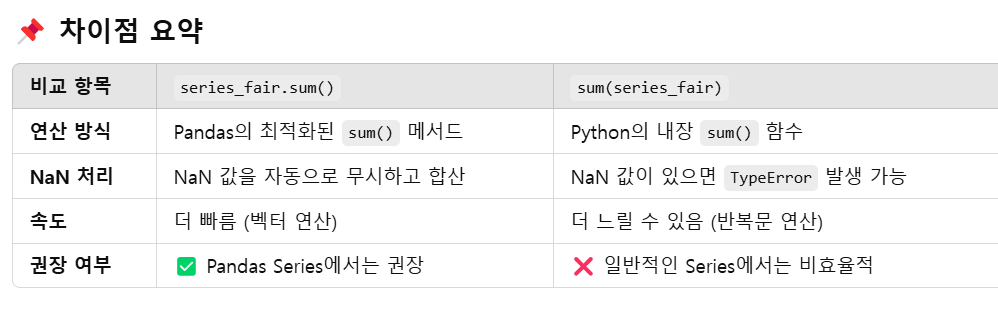

In [28]:
#새로운 인덱스 추가
titanic_reset_df = titanic_df.reset_index(inplace=False)
titanic_reset_df

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S
3,3,4,1,1,"Futrelle, M...",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, R...",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Mis...",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, M...",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. K...",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
print('### before reset_index ###')
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)
print('value_counts 객체 변수 타입:', type(value_counts))
new_value_counts = value_counts.reset_index(inplace=False)
print('### after reset_index ###')
print(new_value_counts)
print('new_value_counts 객체 변수 타입:', type(new_value_counts))

### before reset_index ###
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
value_counts 객체 변수 타입: <class 'pandas.core.series.Series'>
### after reset_index ###
   Pclass  count
0       3    491
1       1    216
2       2    184
new_value_counts 객체 변수 타입: <class 'pandas.core.frame.DataFrame'>


##데이터 셀렉션 및 필터링

In [31]:
print('단일 칼럼 데이터 추출:\n', titanic_df['Pclass'].head(3))
print('\n여러 칼럼의 데이터 푸풀:\n', titanic_df[['Survived','Pclass']].head(3))
print('[ ] 안에 숫자 index는 KeyError 오류 발생:\n',titanic_df[0])

단일 칼럼 데이터 추출:
 0    3
1    1
2    3
Name: Pclass, dtype: int64

여러 칼럼의 데이터 푸풀:
    Survived  Pclass
0         0       3
1         1       1
2         1       3


KeyError: 0

In [32]:
titanic_df[0:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [33]:
titanic_df[titanic_df['Pclass']==3].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.925,NaN,S
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.050,NaN,S


In [34]:
data = {'Name':['Chulmin','Eunkyung','Jinwoong','Soobeom'],
        'Year':[2011,2016,2015,2015],
        'Gender':['Male','Female','Male','Male']}
data_df = pd.DataFrame(data, index=['one','two','three','four'])
data_df

,Name,Year,Gender
one,Chulmin,2011,Male
two,Eunkyung,2016,Female
three,Jinwoong,2015,Male
four,Soobeom,2015,Male


In [35]:
data_df.iloc[0,0]

'Chulmin'

In [36]:
#아래 코드는 오류를 발생시킵니다.
data_df.iloc[0,'Name']

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [37]:
#아래 코드는 오류를 발생시킵니다.
data_df.iloc['one',0]

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [38]:
print('\n 맨 마지막 칼럼 데이터 [:,-1]\n',data_df.iloc[:,-1])
print('\n 맨 마지막 칼럼을 제외한 모든 데이터 [:,:-1]\n',data_df.iloc[:,:-1])


 맨 마지막 칼럼 데이터 [:,-1]
 one        Male
two      Female
three      Male
four       Male
Name: Gender, dtype: object

 맨 마지막 칼럼을 제외한 모든 데이터 [:,:-1]
            Name  Year
one     Chulmin  2011
two    Eunkyung  2016
three  Jinwoong  2015
four    Soobeom  2015


In [40]:
data_df.loc['one','Name']

'Chulmin'

In [41]:
#다음 코드는 오류를 발생시킵니다.
data_df.loc[0,'Name']

KeyError: 0

In [42]:
print('위치기반 iloc slicing\n', data_df.iloc[0:1,0],'\n')
print('명칭기반 loc slicing\n', data_df.loc['one':'two','Name'])

위치기반 iloc slicing
 one    Chulmin
Name: Name, dtype: object 

명칭기반 loc slicing
 one     Chulmin
two    Eunkyung
Name: Name, dtype: object


In [43]:
titanic_df = pd.read_csv('/content/train.csv')
titanic_boolean = titanic_df[titanic_df['Age']>60]
print(type(titanic_boolean))
titanic_boolean

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr...",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. ...",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,Goldschmidt...,male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr...",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,Van der hoe...,male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. ...",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Mi...",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. ...",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr...",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr...",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [44]:
#boolean 인덱싱이 반환하는 것은 dataframd이기에 원하는 칼럼명만 별도로 추출 가능
titanic_df[titanic_df['Age']>60][['Name','Age']].head(3)

,Name,Age
33,"Wheadon, Mr...",66.0
54,"Ostby, Mr. ...",65.0
96,Goldschmidt...,71.0


In [45]:
titanic_df.loc[titanic_df['Age']>60,['Name','Age']].head(3)

,Name,Age
33,"Wheadon, Mr...",66.0
54,"Ostby, Mr. ...",65.0
96,Goldschmidt...,71.0


In [47]:
titanic_df[(titanic_df['Age']>60) & (titanic_df['Pclass']==1)&
           (titanic_df['Sex']=='female')] #개별 조건 ()으로 묶기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Mi...",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs....",female,62.0,0,0,113572,80.0000,B28,NaN


In [48]:
cond1 = titanic_df['Age'] > 60
cond2 = titanic_df['Pclass']==1
cond3 = titanic_df['Sex']=='female'
titanic_df[cond1&cond2&cond3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Mi...",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs....",female,62.0,0,0,113572,80.0000,B28,NaN


##정렬, Aggregation 함수, GroupBy 적용

In [49]:
titanic_sorted = titanic_df.sort_values(by=['Name'])
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr....",male,42.0,0,0,C.A. 5547,7.55,NaN,S
746,747,0,3,"Abbott, Mr....",male,16.0,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs...",female,35.0,1,1,C.A. 2673,20.25,NaN,S


In [52]:
titanic_sorted = titanic_df.sort_values(by=['Pclass','Name'],ascending=False)
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
868,869,0,3,van Melkebe...,male,NaN,0,0,345777,9.5,NaN,S
153,154,0,3,van Billiar...,male,40.5,0,2,A/5. 851,14.5,NaN,S
282,283,0,3,de Pelsmaek...,male,16.0,0,0,345778,9.5,NaN,S


In [53]:
titanic_df.count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,714
SibSp,891
Parch,891
Ticket,891
Fare,891


In [54]:
titanic_df[['Age','Fare']].mean()

,0
Age,29.699118
Fare,32.204208


In [56]:
titanic_groupby = titanic_df.groupby(by='Pclass')
print(type(titanic_groupby))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [59]:
titanic_groupby = titanic_df.groupby('Pclass').count()
titanic_groupby

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [61]:
titanic_groupby = titanic_df.groupby('Pclass')[['PassengerId','Survived']].count()
titanic_groupby

,PassengerId,Survived
Pclass,,
1,216,216
2,184,184
3,491,491


In [62]:
titanic_df.groupby('Pclass')['Age'].agg([max,min])

<ipython-input-62-788e48698d74>:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  titanic_df.groupby('Pclass')['Age'].agg([max,min])
<ipython-input-62-788e48698d74>:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  titanic_df.groupby('Pclass')['Age'].agg([max,min])


,max,min
Pclass,,
1,80.0,0.92
2,70.0,0.67
3,74.0,0.42


In [63]:
#여러 agg 처리하기
agg_format = {'Age':'max','SibSp':'sum','Fare':'mean'}
titanic_df.groupby('Pclass').agg(agg_format)

,Age,SibSp,Fare
Pclass,,,
1,80.0,90,84.154687
2,70.0,74,20.662183
3,74.0,302,13.675550


##결손 데이터 처리하기

In [64]:
#isna()로 결손 데이터 여부 확인하기
titanic_df.isna().head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False


In [65]:
titanic_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [67]:
#fillna()로 결손 데이터 대체하기
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('C000')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,C000,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,C000,S


In [70]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## apply lambda 식으로 데이터 가공

In [72]:
def get_square(a):
  return a**2
print('3의 제곱은:', get_square(3))

3의 제곱은: 9


In [73]:
lambda_squre = lambda x : x**2
print('3의 제곱은:', lambda_squre(3))

3의 제곱은: 9


In [74]:
a= [1,2,3]
squares = map(lambda x: x**2, a) #map() > 여러개의 값을 입력인자로 사용해야 하는 경우
list(squares)

[1, 4, 9]

In [75]:
titanic_df['Name_len'] = titanic_df['Name'].apply(lambda x: len(x))
titanic_df[['Name','Name_len']].head(3)

,Name,Name_len
0,"Braund, Mr....",23
1,"Cumings, Mr...",51
2,"Heikkinen, ...",22


In [76]:
titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda x: 'Child' if x <=15 else 'Adult')
titanic_df[['Age','Child_Adult']].head(8)

,Age,Child_Adult
0,22.000000,Adult
1,38.000000,Adult
2,26.000000,Adult
3,35.000000,Adult
4,35.000000,Adult
5,29.699118,Adult
6,54.000000,Adult
7,2.000000,Child


In [77]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: 'Child' if x<=15 else('Adult' if x<=60
                                                                                else 'Elderly'))
titanic_df['Age_cat'].value_counts()

,count
Age_cat,
Adult,786
Child,83
Elderly,22


In [78]:
#나이에 따라 세분화된 분류를 수행하는 함수 생성
def get_category(age):
  cat = ''
  if age<=5: cat = 'Baby'
  elif age <=12: cat = 'Child'
  elif age <=18: cat = 'Teenager'
  elif age <=25: cat = 'Student'
  elif age <=35: cat = 'Young Adult'
  elif age <=60: cat = 'Adult'
  else: cat = 'Elderly'
  return cat
#lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정.
#get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
titanic_df[['Age','Age_cat']].head()

,Age,Age_cat
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult
